# Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


# Attribute Information

# Importing libraries

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets 

In [35]:
from scipy.stats import skew

In [36]:
import warnings
warnings.filterwarnings('ignore')


In [37]:
sns.set()
%matplotlib inline

# Importing dataset

In [19]:

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [39]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.365813,0.312904,0.321283
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.481715,0.463731,0.467025
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


checking null values

In [58]:
df.isnull().sum(axis = 0)

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
M                 0
F                 0
I                 0
dtype: int64

In [40]:
# Numerical Features and Categorical Features
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

In [41]:
nf

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'M', 'F', 'I'],
      dtype='object')

In [42]:
# List of Categorical Features
cf

Index([], dtype='object')

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>,
        <AxesSubplot:title={'center':'M'}>,
        <AxesSubplot:title={'center':'F'}>,
        <AxesSubplot:title={'center':'I'}>, <AxesSubplot:>]], dtype=object)

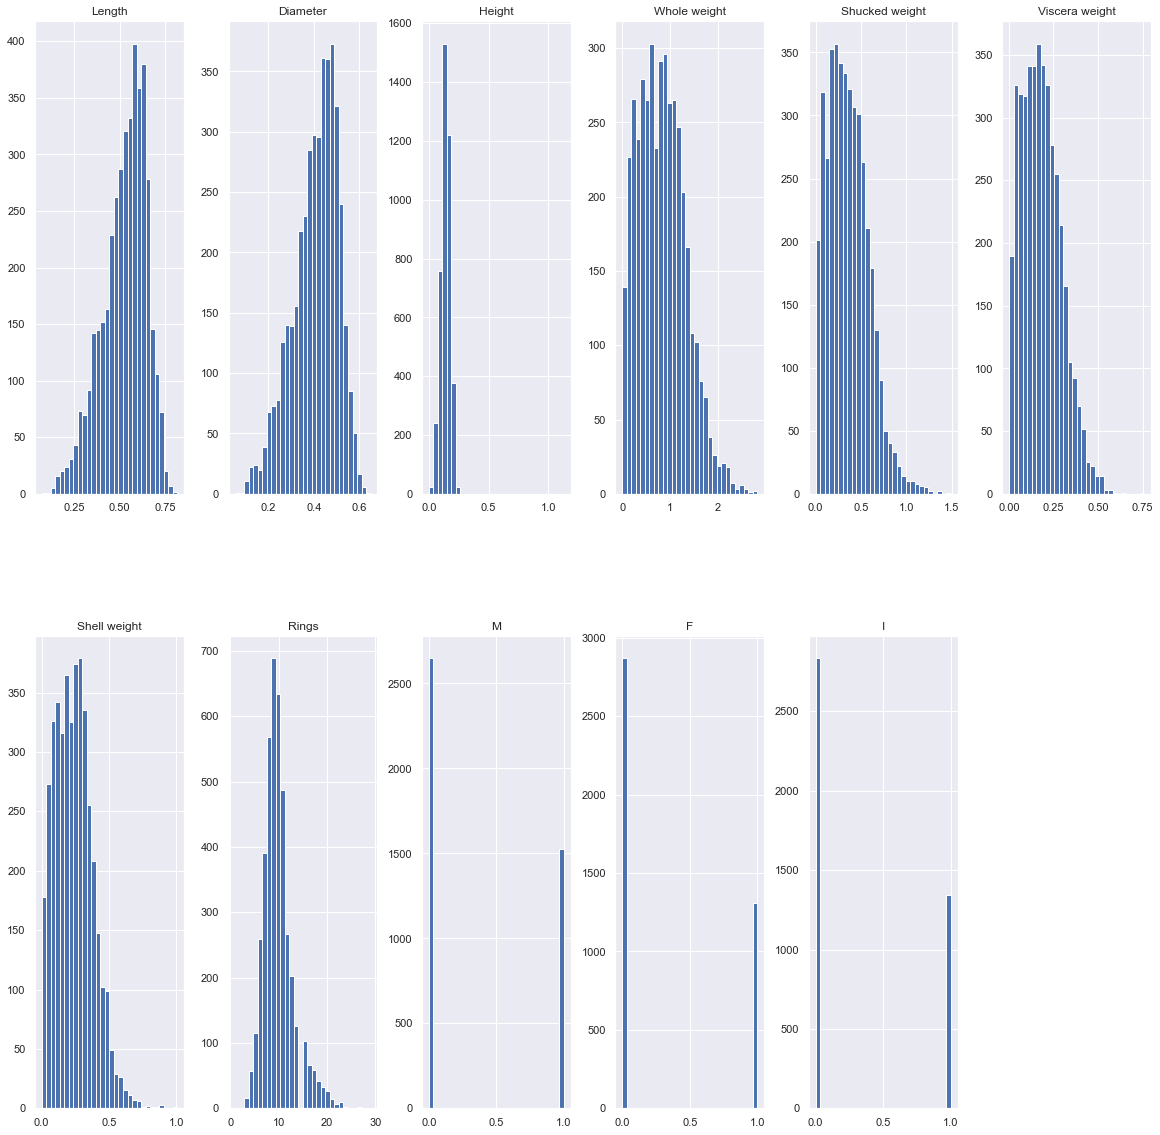

In [60]:
df.hist(figsize=(20,20), grid = True, layout = (2,6), bins = 30)

In [61]:
# After Seeing Above Graph of Data Distribution, I feel the Data is skewed, So checking for Skewness
skew_list = skew(df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [45]:
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.127694
7,Rings,1.113702
9,F,0.807012
10,I,0.765433
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
8,M,0.557190
3,Whole weight,0.530768
1,Diameter,-0.608979


In [62]:
# Missing Values 
mv_df = df.isnull().sum().sort_values(ascending = False)
pmv_df = (mv_df/len(df)) * 100
missing_df = pd.concat([mv_df,pmv_df], axis = 1, keys = ['Missing Values','% Missing'])

In [63]:
missing_df

,Missing Values,% Missing
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
Rings,0,0.0
M,0,0.0
F,0,0.0


In [64]:
#Target Column Analysis
print("Value Count of Rings Column")
print(df.Rings.value_counts())
print("\nPercentage of Rings Column")
print(df.Rings.value_counts(normalize = True))

Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

Percentage of Rings Column
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
27    0.000479
24    0.000479
26    0.000239
29    0.000239
25    0.000239
1     0.000239
2     0.000239
Name: Rings, dtype: float64


No of Classes In Target

In [65]:
print(len(df.Rings.unique()))

28


# visualization

<AxesSubplot:xlabel='M', ylabel='count'>

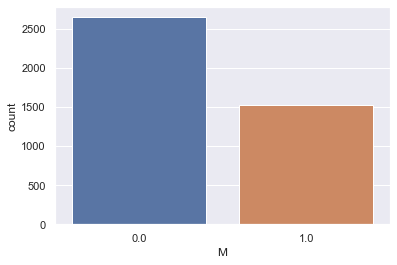

In [68]:
# Sex Count of Abalone, M - Male, F - Female, I - Infant
sns.countplot(x='M', data = df)

In [71]:
print("\nM Count in Percentage")
print(df.M.value_counts(normalize = True))
print("\nM Count in Numbers")
print(df.M.value_counts())


M Count in Percentage
0.0    0.634187
1.0    0.365813
Name: M, dtype: float64

M Count in Numbers
0.0    2649
1.0    1528
Name: M, dtype: int64


<AxesSubplot:xlabel='F', ylabel='count'>

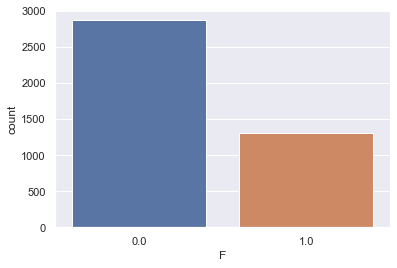

In [69]:
sns.countplot(x='F', data = df)

In [72]:
print("\nF Count in Percentage")
print(df.F.value_counts(normalize = True))
print("\nF Count in Numbers")
print(df.F.value_counts())


F Count in Percentage
0.0    0.687096
1.0    0.312904
Name: F, dtype: float64

F Count in Numbers
0.0    2870
1.0    1307
Name: F, dtype: int64


<AxesSubplot:xlabel='I', ylabel='count'>

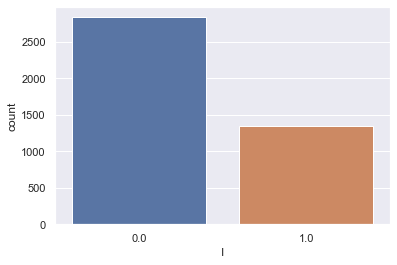

In [70]:
sns.countplot(x='I', data = df)

In [73]:
print("\nI Count in Percentage")
print(df.I.value_counts(normalize = True))
print("\nI Count in Numbers")
print(df.I.value_counts())


I Count in Percentage
0.0    0.678717
1.0    0.321283
Name: I, dtype: float64

I Count in Numbers
0.0    2835
1.0    1342
Name: I, dtype: int64


In [74]:
# Small Feature Engineering, Deriving Age from Rings Column, Age = Rings + 1.5
df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

In [79]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1.0,0.0,0.0,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1.0,0.0,0.0,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.0,1.0,0.0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1.0,0.0,0.0,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,0.0,1.0,8.5
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0.0,0.0,1.0,9.5
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,0.0,1.0,0.0,21.5
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,0.0,1.0,0.0,17.5
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,1.0,0.0,0.0,10.5
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,0.0,1.0,0.0,20.5
